# 分散分析のデモ

ある変量の変動の要因を分析する場合には、母集団のサブグループ別に分布や平均値を比較して、グループ間で差があるかどうかをみる、ということはよく行われます。これをより系統的に行う手法が分散分析です。分散分析は、原理的にはダミー変数を用いた回帰分析と同じですが、例えば「性別」や「年齢階級」といった要因単位で指標値に有意に影響を及ぼしているかを見るような場合に便利です。ここでは都道府県別の各種指標値を例題として、「（地理的に隣接した）地方」や「大都市があるか」といった要因で異なるかどうかを見ることにします。

In [3]:
# japanize_matplotlibが未インストール状態の場合に、コメント解除して本セルを単独で実行する（先頭に!が必要）
#!pip install japanize-matplotlib

In [4]:
# Googleドライブをマウントする場合、２行のコメント解除して本セルを単独で実行する
#from google.colab import drive
#drive.mount('/content/drive')

In [5]:
# ライブラリのインポート
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font=['IPAexGothic'])
import japanize_matplotlib # matplotlib日本語
from google.colab import files # 画像ファイルダウンロード用

ここでは、日本の47都道府県をクロスセクションデータとして用いることにします。まず、エクセルファイルからPandasデータフレームに都道府県の属性データを読込みます。

In [6]:
# ファイルからデータを読み込む
df01 = pd.read_excel('/content/drive/My Drive/Colab Notebooks/データ解析講座一日目演習.xlsx',sheet_name='都道府県')
df01.head()

,コード,県名,地域,都市化,メディア
0,1,北 海 道,北海道東北,郊外,アイランドマス
1,2,青 森 県,北海道東北,郊外,アイランドマス
2,3,岩 手 県,北海道東北,郊外,テレビ・ラジエリアン
3,4,宮 城 県,北海道東北,都市,テレビラバーズ
4,5,秋 田 県,北海道東北,郊外,テレビラバーズ


上記のデータ列のうち、「都市化」は政令指定都市がある道府県から北海道を除いて東京都と香川県（四国経済の拠点が多く存在）を加えたものを「都市県」、その他を「郊外県」としました。また、「メディア」は以下の記事にあるメディア接触の特徴に関する分類です。 https://news.livedoor.com/article/detail/9064551/

同様に、公的ウェブサイトに掲載されている、47都道府県の家計指標データを読込みます。

In [7]:
# ファイルからデータを読み込む
df02 = pd.read_excel('/content/drive/My Drive/Colab Notebooks/データ解析講座一日目演習.xlsx',sheet_name='家計指標')
df02.head()

,コード,県名,実収入,世帯主収入,消費支出,食料費割合,住居費割合,光熱・水道費割合,家具・家事用品費割合,被服及び履物費割合,保健医療費割合
0,1,北 海 道,529.9,422.7,287.3,24.2,5.9,8.5,3.3,3.9,4.3
1,2,青 森 県,442.9,333.4,236.8,29.2,4.0,11.3,4.1,3.3,4.2
2,3,岩 手 県,522.9,403.5,289.0,24.6,5.2,8.7,3.7,3.8,5.1
3,4,宮 城 県,419.9,341.5,281.0,26.4,6.5,7.8,4.0,4.1,5.1
4,5,秋 田 県,459.0,343.4,255.2,25.6,5.4,9.6,3.7,3.1,5.4


そして、読み込んだ2つのデータフレームを、県名をキーとして横に連結します。

In [8]:
# 県名をキーにして横連結する
df1 = pd.merge(df01, df02, left_on='県名', right_on='県名')
df1.drop(columns=['コード_x','コード_y'],inplace=True)
df1.head()

,県名,地域,都市化,メディア,実収入,世帯主収入,消費支出,食料費割合,住居費割合,光熱・水道費割合,家具・家事用品費割合,被服及び履物費割合,保健医療費割合
0,北 海 道,北海道東北,郊外,アイランドマス,529.9,422.7,287.3,24.2,5.9,8.5,3.3,3.9,4.3
1,青 森 県,北海道東北,郊外,アイランドマス,442.9,333.4,236.8,29.2,4.0,11.3,4.1,3.3,4.2
2,岩 手 県,北海道東北,郊外,テレビ・ラジエリアン,522.9,403.5,289.0,24.6,5.2,8.7,3.7,3.8,5.1
3,宮 城 県,北海道東北,都市,テレビラバーズ,419.9,341.5,281.0,26.4,6.5,7.8,4.0,4.1,5.1
4,秋 田 県,北海道東北,郊外,テレビラバーズ,459.0,343.4,255.2,25.6,5.4,9.6,3.7,3.1,5.4


In [9]:
# 一元配置分散分析
import statsmodels.formula.api as smf
import statsmodels.api as sm
oneway_anova = smf.ols(formula='食料費割合~地域+都市化+メディア',data=df1).fit()
sm.stats.anova_lm(oneway_anova,typ=2).round(2)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,sum_sq,df,F,PR(>F)
地域,34.42,6.0,2.82,0.02
都市化,17.77,1.0,8.75,0.01
メディア,23.32,6.0,1.91,0.11
Residual,67.04,33.0,NaN,NaN


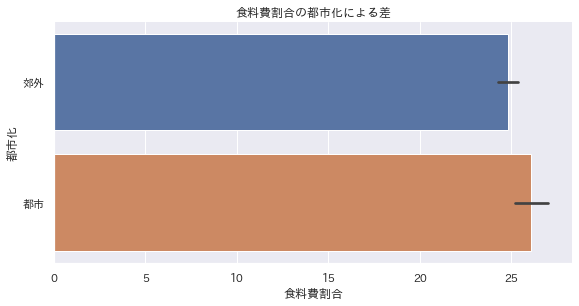

In [10]:
# 有意差のある効果についてその中身をみる
import matplotlib.pyplot as plt
import seaborn as sns
p = sns.catplot(x='食料費割合',y='都市化',data=df1,kind='bar',height=4,aspect=2)
p.set(title='食料費割合の都市化による差')

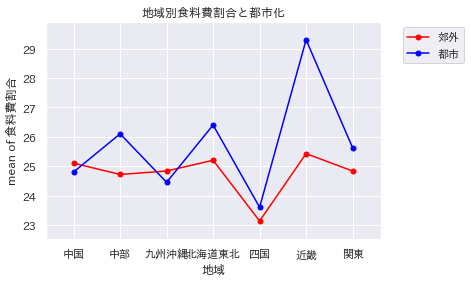

In [11]:
# 交互作用の図示
from statsmodels.graphics.factorplots import interaction_plot
fig=interaction_plot(df1.地域,df1.都市化,df1.食料費割合,colors=['red','blue'],ms=10)
plt.title('地域別食料費割合と都市化')
plt.legend(bbox_to_anchor=(1.05,1.0),loc='upper left')

In [12]:
# ファイルからデータを読み込む
df03 = pd.read_excel('/content/drive/My Drive/Colab Notebooks/データ解析講座一日目演習.xlsx',sheet_name='医療健康指標')
df03.head()

,コード,県名,有訴者率,通院者率,一般病院年間新入院患者数,一般病院の１日平均,一般病院の１日平均.1,標準化死亡率,平均余命1,平均余命2,平均余命3
0,1,北 海 道,289.3,397.6,15481.5,1373.0,1190.7,1.78,79.17,86.30,18.75
1,2,青 森 県,282.2,372.7,11805.6,1011.3,843.5,2.01,77.28,85.34,17.59
2,3,岩 手 県,304.7,421.4,11824.0,949.0,793.1,1.85,78.53,85.86,18.46
3,4,宮 城 県,307.3,386.9,11529.9,849.0,642.6,1.61,79.65,86.39,18.81
4,5,秋 田 県,290.8,405.2,13553.3,1218.6,915.6,1.85,78.22,85.93,18.10


In [13]:
# 県名をキーにして横連結する
df2 = pd.merge(df01, df03, left_on='県名', right_on='県名')
df2.drop(columns=['コード_x','コード_y'],inplace=True)
df2.head()

,県名,地域,都市化,メディア,有訴者率,通院者率,一般病院年間新入院患者数,一般病院の１日平均,一般病院の１日平均.1,標準化死亡率,平均余命1,平均余命2,平均余命3
0,北 海 道,北海道東北,郊外,アイランドマス,289.3,397.6,15481.5,1373.0,1190.7,1.78,79.17,86.30,18.75
1,青 森 県,北海道東北,郊外,アイランドマス,282.2,372.7,11805.6,1011.3,843.5,2.01,77.28,85.34,17.59
2,岩 手 県,北海道東北,郊外,テレビ・ラジエリアン,304.7,421.4,11824.0,949.0,793.1,1.85,78.53,85.86,18.46
3,宮 城 県,北海道東北,都市,テレビラバーズ,307.3,386.9,11529.9,849.0,642.6,1.61,79.65,86.39,18.81
4,秋 田 県,北海道東北,郊外,テレビラバーズ,290.8,405.2,13553.3,1218.6,915.6,1.85,78.22,85.93,18.10


In [14]:
# 一元配置分散分析
#import statsmodels.formula.api as smf
#import statsmodels.api as sm
oneway_anova = smf.ols(formula='有訴者率~地域+都市化+メディア',data=df2).fit()
sm.stats.anova_lm(oneway_anova,typ=2).round(2)

,sum_sq,df,F,PR(>F)
地域,2537.85,6.0,3.92,0.00
都市化,809.88,1.0,7.50,0.01
メディア,1427.17,6.0,2.20,0.07
Residual,3563.86,33.0,NaN,NaN


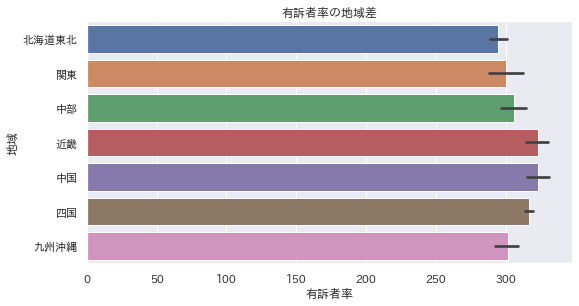

In [15]:
# 有意差のある効果についてその中身をみる
#import matplotlib.pyplot as plt
#import seaborn as sns
p = sns.catplot(x='有訴者率',y='地域',data=df2,kind='bar',height=4,aspect=2)
p.set(title='有訴者率の地域差')

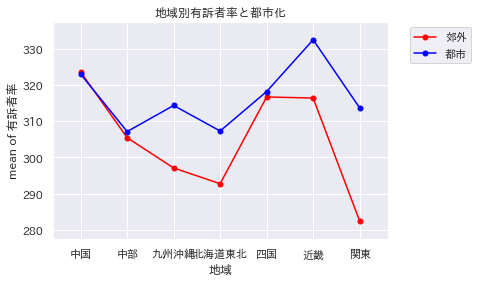

In [24]:
# 交互作用の図示
#from statsmodels.graphics.factorplots import interaction_plot
fig=interaction_plot(df2.地域,df2.都市化,df2.有訴者率,colors=['red','blue'],ms=10)
plt.title('地域別有訴者率と都市化')
plt.legend(bbox_to_anchor=(1.05,1.0),loc='upper left')

In [17]:
# ファイルからデータを読み込む
df04 = pd.read_excel('/content/drive/My Drive/Colab Notebooks/データ解析講座一日目演習.xlsx',sheet_name='労働指標')
df04.head()

,コード,県名,労働力人口比率1,労働力人口比率2,第１次産業就業者比率,第２次産業就業者比率,第３次産業就業者比率,完全失業率,雇用者比率,県内就業者比率,他市区町村への通勤者比率
0,1,北 海 道,64.2,44.6,7.0,16.9,70.6,4.6,78.4,95.0,28.0
1,2,青 森 県,67.9,48.6,12.0,19.8,65.1,5.3,75.4,96.6,19.2
2,3,岩 手 県,69.6,49.6,10.6,25.1,62.9,4.0,78.6,97.2,21.8
3,4,宮 城 県,67.4,46.6,4.4,22.9,70.5,4.9,82.4,96.7,43.1
4,5,秋 田 県,66.4,46.2,9.6,24.0,64.7,4.3,77.7,98.1,16.3


In [18]:
# 県名をキーにして横連結する
df4 = pd.merge(df01, df04, left_on='県名', right_on='県名')
df4.drop(columns=['コード_x','コード_y'],inplace=True)
df4.head()

,県名,地域,都市化,メディア,労働力人口比率1,労働力人口比率2,第１次産業就業者比率,第２次産業就業者比率,第３次産業就業者比率,完全失業率,雇用者比率,県内就業者比率,他市区町村への通勤者比率
0,北 海 道,北海道東北,郊外,アイランドマス,64.2,44.6,7.0,16.9,70.6,4.6,78.4,95.0,28.0
1,青 森 県,北海道東北,郊外,アイランドマス,67.9,48.6,12.0,19.8,65.1,5.3,75.4,96.6,19.2
2,岩 手 県,北海道東北,郊外,テレビ・ラジエリアン,69.6,49.6,10.6,25.1,62.9,4.0,78.6,97.2,21.8
3,宮 城 県,北海道東北,都市,テレビラバーズ,67.4,46.6,4.4,22.9,70.5,4.9,82.4,96.7,43.1
4,秋 田 県,北海道東北,郊外,テレビラバーズ,66.4,46.2,9.6,24.0,64.7,4.3,77.7,98.1,16.3


In [19]:
df4.rename(columns={'第１次産業就業者比率':'第一次産業就業者比率','第２次産業就業者比率':'第二次産業就業者比率','第３次産業就業者比率':'第三次産業就業者比率'},inplace=True)

In [20]:
# 一元配置分散分析
#import statsmodels.formula.api as smf
#import statsmodels.api as sm
oneway_anova = smf.ols(formula='第二次産業就業者比率~地域+都市化+メディア',data=df4).fit()
sm.stats.anova_lm(oneway_anova,typ=2).round(2)

,sum_sq,df,F,PR(>F)
地域,265.97,6.0,3.95,0.00
都市化,8.88,1.0,0.79,0.38
メディア,227.67,6.0,3.38,0.01
Residual,370.68,33.0,NaN,NaN


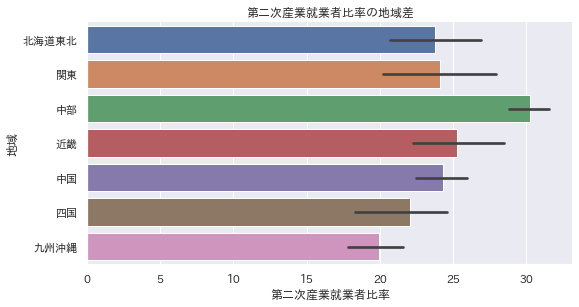

In [21]:
# 有意差のある効果についてその中身をみる
#import matplotlib.pyplot as plt
#import seaborn as sns
p = sns.catplot(x='第二次産業就業者比率',y='地域',data=df4,kind='bar',height=4,aspect=2)
p.set(title='第二次産業就業者比率の地域差')